In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression


# preprocessing

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataurl = 'https://raw.githubusercontent.com/digipodium/Datasets/main/automobile.csv'
df = pd.read_csv(dataurl,index_col=0)
df.head()

In [ ]:
df.info()

In [ ]:
df.isin(['?']).sum()

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df.head(10)

In [ ]:
df.isnull().sum()

In [ ]:
imputer = SimpleImputer()
cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
df[cols] = imputer.fit_transform(df[cols])
df.head()

In [ ]:
imputer2 = SimpleImputer(strategy='most_frequent')
cols=['num-of-doors']
df[cols] = imputer2.fit_transform(df[cols])
df.head()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv('processed_automobile.csv',index=False)

# Exploratory Data Analysis
- numerical
- categorical

In [ ]:
df.describe(include=['int','float'])

In [ ]:
import seaborn as sns

In [ ]:
df['price'] = df['price'].astype(float)

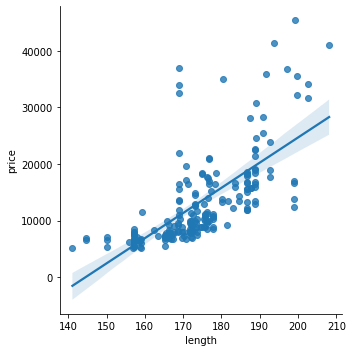

In [42]:
sns.lmplot(x='length',y='price',data=df)

In [43]:
df.corrwith(df['price']) # correlation with price

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
dtype: float64

<AxesSubplot:>

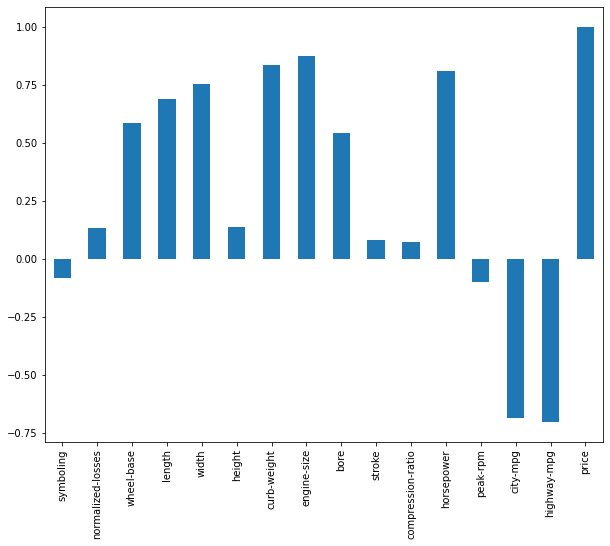

In [44]:
df.corrwith(df['price']).plot(kind='bar',figsize=(10,8))

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [110]:
numerical_cols = df.select_dtypes(include=['int','float']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [118]:
df[categorical_cols].nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='fuel-type'>

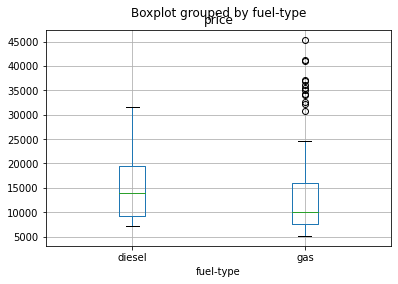

In [112]:
df.boxplot(column='price',by='fuel-type')

<AxesSubplot:title={'center':'price'}, xlabel='drive-wheels'>

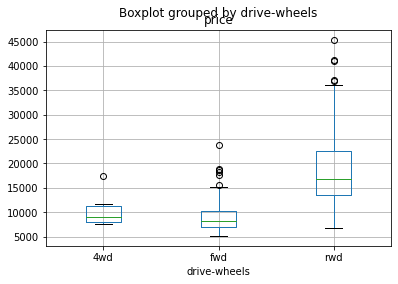

In [114]:
df.boxplot(column='price',by='drive-wheels')

<AxesSubplot:title={'center':'price'}, xlabel='body-style'>

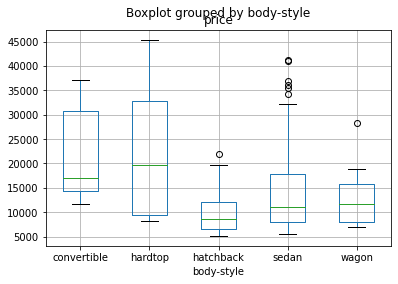

In [115]:
df.boxplot(column='price',by='body-style')

<AxesSubplot:title={'center':'price'}, xlabel='num-of-cylinders'>

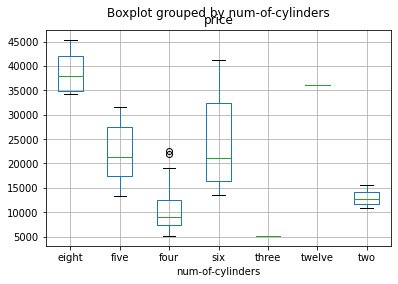

In [117]:
df.boxplot(column='price',by='num-of-cylinders')

#### convert all the selected categorical columns to numerical using label encoder or onehot encoding

# training

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression,k=5)

In [100]:
selected_df = selector.fit_transform(df[numerical_cols[:-1]],df['price'])

In [101]:
selected_df.shape

(201, 15)

In [102]:
selector.get_feature_names_out()

array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'], dtype=object)

In [103]:
X =  selected_df
y = df['price']
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [104]:
model = LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest) * 100

79.86132636312378

In [105]:
pred = model.predict(X)

In [106]:
df['pred'] = pred

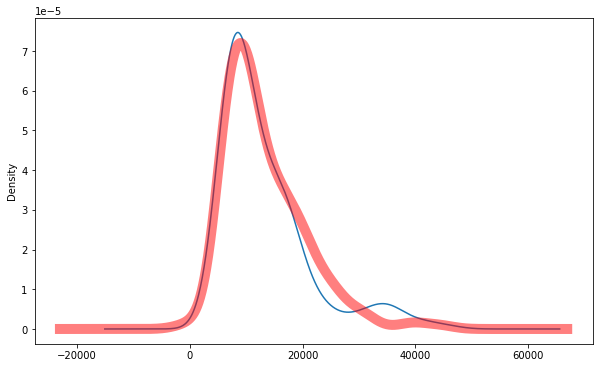

In [109]:
ax = df['price'].plot(kind='kde',figsize=(10,6))
df['pred'].plot(kind='kde',ax=ax,color='red',alpha=.5,linewidth=10)
plt.show()